EDA of Google Play Store Data
* Author: Adeel Hamid
* Date: 24-10-2023

In [2]:
# importing the libraries
import pandas as pd

In [3]:
# Loading Data
df=pd.read_csv('googleplaystore.csv')

In [4]:
# View Data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# viewing shape
df.shape

(10841, 13)

In [6]:
# checking the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  int64  
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


Explanation:
1. There are 9660 unique apps in the dataset. It means there can exist duplicates in the dataset. We need to remove them. So, there are 483 duplicates in the dataset.
2. As we can see there are 10841 rows and 13 columns in the dataset.
3. There are 13 columns in the dataset out of which 12 are of object type and 1 is of float type.
4. There are null values in the dataset, we can see that Rating has 1474 null values, Type has 1 null value, Content Rating has 1 null value, Current Ver has 8 null values and Android Ver has 3 null values.
5. There are 33 unique categories in the dataset.
6. There are 40 unique genres in the dataset.
7. There are 2 unique types in the dataset.
8. There are 6 unique content ratings in the dataset.
9. There are 2832 unique android versions in the dataset.
10. 


# Dealing with Duplicates first of all

In [7]:
# checking number of duplicates in the data set
df.duplicated().sum()

483

In [8]:
# want to show the duplicate rows and the original rows one by one for comparison
dup=df[df.duplicated(keep=False)].sort_values(by='App')
dup

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3,"500,000",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3,"500,000",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26,"1,000,000",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26,"1,000,000",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3,"1,000",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34,"10,000,000",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34,"10,000,000",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,21,"50,000,000",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,21,"50,000,000",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


In [9]:
# now showing all the duplicate rows which are unique and we are to remove
duplicates=df[df.duplicated()]
duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,21,"5,000,000",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,21,"10,000,000",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,21,"5,000,000",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37,"10,000,000",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,21,"1,000,000",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,21,"10,000,000",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,21,"1,000,000",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,21,"100,000,000",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86,"10,000",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [10]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

As this record is duplicate, we will remove it. We will keep only one record and remove all other duplicates. but first we will show all the duplicates one after the other so that we can make sure that they are all duplicates


In [11]:
# want to show all the categories of duplicate rows
duplicates['Category'].value_counts().sum()

483

In [12]:
# we are going to delete the duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
# Remaining rows after deleting the duplicate rows
df.shape

(10358, 13)

In [14]:
# checking the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  int64  
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


We can see that there are null values. we need to identify and deal with them now

In [15]:
# Printing null values in the data
df.isnull().sum()

App                  0
Category             1
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
# We want to check the dependancy of rating column on the other like correlation but we can take correlation of only numeric data.
df['Price'].dtype # This is object value we need to change it into float or int

dtype('O')

In [17]:
# view the price column
df['Price']
# Now we check its unique values
df['Price'].unique() # we need to remove dollar sign from the data


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
# i want to remove $ sign from the price values
df['Price']=df['Price'].apply(lambda x: x.strip('$'))

In [19]:
df['Price'].unique() # verifying the dollar sign is removed

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [20]:
df['Price'].dtype # checking the data type of price column

dtype('O')

In [21]:
# now changing the data type of price column to float
df['Price']=df['Price'].astype(float)

In [22]:
df['Price'].dtype # checking the data type of price column

dtype('float64')

In [23]:
df.describe() # checking the summary of the data

,Rating,Reviews,Size,Price
count,8893.000000,1.035800e+04,10358.000000,10358.000000
mean,4.187619,4.058654e+05,21.076463,1.030701
std,0.522910,2.696651e+06,20.948139,16.277843
min,1.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,3.200000e+01,5.000000,0.000000
50%,4.300000,1.678500e+03,17.000000,0.000000
75%,4.500000,4.640425e+04,26.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


In [24]:
df.info() # checking the data types of the data

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  int64  
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [25]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,"5,000,000",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,"100,000",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9,"1,000",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21,"1,000",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [26]:
# installs showing the object data type we need to change it into int or float so first check the unique values
df['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [28]:
# now changing the data type of Installs column to float
df['Installs'] = df['Installs'].str.replace(',', '').astype(float)


In [30]:
df['Installs'].dtype 

dtype('float64')

In [31]:
# now we check for the unique values of the column types
df['Type'].unique() # there are three types of values so it is catagorical and we can impute nan values and then convert it into numeric 1 and 0


array(['Free', 'Paid', nan], dtype=object)

In [32]:
df['Type'].isnull().sum() # checking the null values in the column

1

In [33]:
# there is only one column where type is null so we can impute it with mode but i want to see that column
df[df['Type'].isnull()] # it is a free app so we can impute it with free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,21,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [34]:
# This was only one app and it was very easy to verify this through google play store so i am imputing it with free
df['Type'].fillna('Free',inplace=True)

In [35]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [36]:
# now we can convert it into numeric 1 and 0
df['Type']=df['Type'].map({'Free':0,'Paid':1})

In [37]:
df['Type'].dtype

dtype('int64')

In [38]:
# it should be in bool type
df['Type']=df['Type'].astype(bool)

In [39]:
# now we check the content rating unique values
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [40]:
# checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  int64  
 5   Installs        10358 non-null  float64
 6   Type            10358 non-null  bool   
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [42]:
# checking the unique vlaues in genre column
df['Genres'].nunique()

119

In [43]:
# checking null values in genre column
df['Genres'].isnull().sum()

1

In [44]:
# want to see the null values in genre column
df[df['Genres'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3,1000.0,False,0.0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [46]:
# this should be converted to art and design
df['Genres'].fillna('Art & Design',inplace=True) # imputing the null values with art and design
# its category should be art and design
df['Category'].fillna('ART_AND_DESIGN',inplace=True) # we evaluated it from google play store and from the data set

In [50]:

# Select only the numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display or analyze the correlation matrix
print(correlation_matrix)



            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.068738  0.077267  0.050925 -0.022301
Reviews   0.068738  1.000000  0.130027  0.634998 -0.009416
Size      0.077267  0.130027  1.000000  0.082355 -0.024205
Installs  0.050925  0.634998  0.082355  1.000000 -0.011146
Price    -0.022301 -0.009416 -0.024205 -0.011146  1.000000


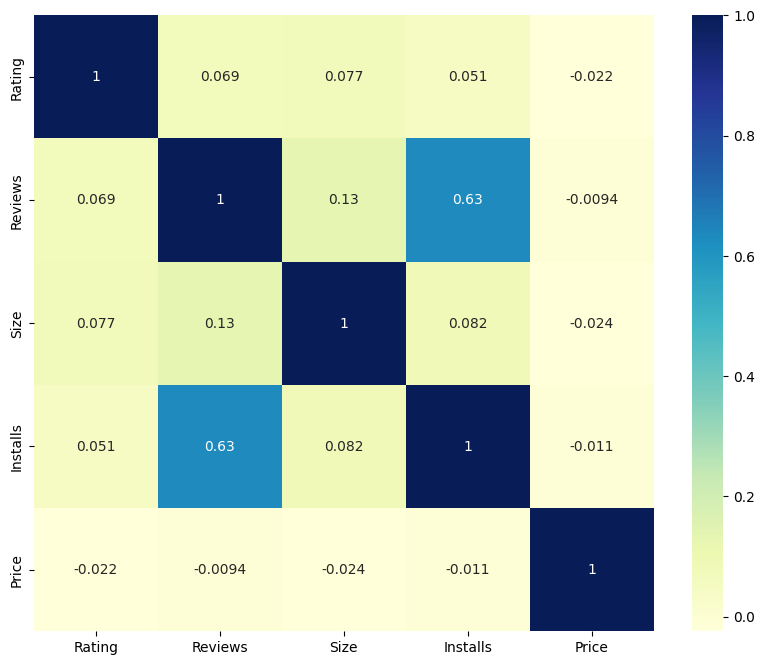

In [51]:
# creaing a heatmap for the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()
